In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path
# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Convolution1D,LSTM,MaxPooling1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model

In [7]:
test='Test.csv'
test_data=pd.read_csv(test)
test_data

Time  Status  Latitude  Longitude  Maximum Wind  Minimum Pressure  \
0        0       5      12.5      107.5            25              -999   
1     1800       5      15.4      119.9            25              1007   
2     1800       5      17.6      119.4            25              -999   
3     1800       6      18.7      112.7            45               999   
4        0       3      13.1      117.0           110              -999   
...    ...     ...       ...        ...           ...               ...   
5218     0       6      14.3      125.4            55               994   
5219  1200       4      15.3      114.4            20              1009   
5220  1800       4      26.0      114.8            20              1010   
5221  1200       5      34.3      166.3            30              1009   
5222   600       6      18.0      107.3            55              -999   

      Low Wind NE  Low Wind SE  Low Wind SW  Low Wind NW  ...  \
0            -999         -999         -999         -999  ...   
1            -999         -999         -999         -999  ...   
2            -999         -999         -999         -999  ...   
3            -999         -999         -999         -999  ...   
4            -999         -999         -999         -999  ...   
...           ...          ...          ...          ...  ...   
5218         -999         -999         -999         -999  ...   
5219            0            0            0            0  ...   
5220            0            0            0            0  ...   
5221         -999         -999         -999         -999  ...   
5222         -999         -999         -999         -999  ...   

      Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  High Wind NE  \
0                 -999              -999              -999          -999   
1                 -999              -999              -999          -999   
2                 -999              -999              -999          -999   
3                 -999              -999              -999          -999   
4                 -999              -999              -999          -999   
...                ...               ...               ...           ...   
5218              -999              -999              -999          -999   
5219                 0                 0                 0             0   
5220                 0                 0                 0             0   
5221              -999              -999              -999          -999   
5222              -999              -999              -999          -999   

      High Wind SE  High Wind SW  High Wind NW  Year  Month  Day  
0             -999          -999          -999  1982      8   30  
1             -999          -999          -999  1996     10    8  
2             -999          -999          -999  1983      7    5  
3             -999          -999          -999  1992      7   29  
4             -999          -999          -999  1978      6   21  
...            ...           ...           ...   ...    ...  ...  
5218          -999          -999          -999  1999      8    8  
5219             0             0             0  2006     10   14  
5220             0             0             0  2011      7   25  
5221          -999          -999          -999  2002      9    1  
5222          -999          -999          -999  1984      9    6  

[5223 rows x 21 columns]

In [8]:
target = test_data['Status']
test_data.drop(['Status'], axis=1, inplace=True)
print('Data shape', test_data.shape)

Data shape (5223, 20)


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
import joblib
X, y = np.array(test_data), np.array(target)
# label encode the target variable
y = LabelEncoder().fit_transform(y)
scaler = joblib.load('scaler.pkl')
X = scaler.transform(X)
y_data = LabelBinarizer().fit_transform(y)
X_data=np.array(X)
y_data=np.array(y_data)


In [11]:
X_test = np.reshape(X_data, ( X_data.shape[0], X_data.shape[1], 1))

In [14]:
model = Sequential() # initializing model
lstm_output_size = 16
model.add(Convolution1D(32,3,input_shape=(X_test.shape[1], X_test.shape[2])))
model.add(Convolution1D(32, 3,  activation="relu"))
model.add(MaxPooling1D(2))
model.add(Convolution1D(16, 3,  activation="relu"))
model.add(Convolution1D(16, 3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(LSTM(lstm_output_size))
model.add(Dropout(0.1))
model.add(Dense(7, activation="softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 32)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 16)             1552      
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 16)             784       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 16)            0         
 1D)                                                  

In [16]:
from keras.models import load_model
model = load_model("CNNLSTM.h5")

In [17]:
predict=model.predict(X_test)


164/164 [==============================] - 1s 3ms/step


In [18]:
y_pred=np.argmax(predict, axis=1)

In [19]:
set(y_pred)

{0, 1, 2, 3, 4, 5, 6}

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test=y
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9590273789010147
Precision: 0.8708062445418115
Recall: 0.7682861671593909
F1-score: 0.8070891923275934


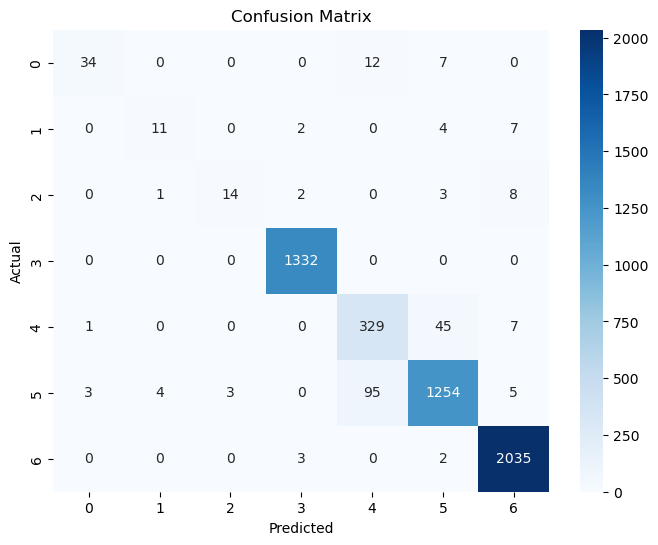

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()